# importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to avoid dtype error 
xyz=pd.read_table(r"C:\Users\Mary\OneDrive\Desktop\cvs\XYZCorp_LendingData.txt",low_memory=False)

In [3]:
xyz.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
#xyz.columns

In [5]:
xyz.shape

(855969, 73)

In [6]:
print(xyz.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [7]:
xyz.nunique()

id                  855969
member_id           855969
loan_amnt             1368
funded_amnt           1368
funded_amnt_inv       8818
                     ...  
total_rev_hi_lim     20793
inq_fi                  16
total_cu_tl             27
inq_last_12m            27
default_ind              2
Length: 73, dtype: int64

# cleaning the data

In [8]:
total = xyz.isnull().sum().sort_values(ascending=False)
percent= (xyz.isnull().sum()/xyz.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(32)

,Total,Percent
dti_joint,855529,99.948596
annual_inc_joint,855527,99.948363
verification_status_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
open_acc_6m,842681,98.447607
open_rv_12m,842681,98.447607
open_il_24m,842681,98.447607
total_bal_il,842681,98.447607
open_rv_24m,842681,98.447607


In [9]:
#evident from the above heatmap that our dataset contains a lot of missing values.
#heatmap shows how many values are missing in every columns. all the light colored columns represents the amount of missing values present in that specific column.

In [10]:
#plt.figure(figsize=(15,5))
#sns.heatmap(xyz.isnull() ,cbar=False,yticklabels=False,cmap="magma")

In [11]:
for i in xyz.columns:
    if missing_data.loc[i,'Percent'] >= 75:
        xyz=xyz.drop(i,axis=1)

In [12]:
xyz.shape

(855969, 53)

In [13]:
#drop the unique id col

In [14]:
# id variable because its a unique number
# member_id variable because its a unique number
# zip_code variable because its a unique number
# policy_code variable because it has same value for all observation
# payment_plan variable because it has same value for all observation
# last_credit_pull_d variable because it's a date varibale with (102 level)
# next_pymnt_d variable because 
# it's a date varibale with (3 level) and it contains 29% Missing info.
# earliest_cr_line variable because it's a date varibale with (697 level)
# addr_state variable for trail purpose (51 level)
# last_pymnt_d variable for trail purpose (51 level)
# application_type is 'INDIVIDUAL' for 99.94% of the records
# acc_now_delinq is 0 for 99.5% of the records
xyz=xyz.drop(['id','member_id','zip_code','grade','sub_grade','policy_code','pymnt_plan','last_credit_pull_d','next_pymnt_d','earliest_cr_line',
             'addr_state','last_pymnt_d','acc_now_delinq','issue_d','collection_recovery_fee','delinq_2yrs','application_type'],axis=1)
xyz.shape

(855969, 36)

In [15]:
# Visualising the missing values in each column after dropping the variables

#plt.figure(figsize=(15,5))
#sns.heatmap(xyz.isnull(), cbar = False, yticklabels=False, cmap="plasma" )

In [16]:
xyz.shape

(855969, 36)

# missing value treatment

In [17]:
xyz.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
emp_title                      49443
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
purpose                            0
title                             33
dti                                0
inq_last_6mths                     0
mths_since_last_delinq        439812
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       446
total_acc                          0
initial_list_status                0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
t

In [18]:
xyz.emp_length.value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [19]:
xyz.emp_length=xyz.emp_length.fillna('0')
xyz['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
#xyz['emp_length']=xyz['emp_length'].astype(int)

In [20]:
xyz.emp_title.value_counts()

Teacher                            12965
Manager                            10821
Registered Nurse                    5341
RN                                  5182
Owner                               5157
                                   ...  
D&H Enterprises                        1
synergy llc                            1
Nexion Health Inc                      1
SCOE                                   1
Manager Hotel Operations Oasis         1
Name: emp_title, Length: 290912, dtype: int64

In [21]:
xyz.emp_title=xyz.emp_title.fillna('Teacher')

In [22]:
#xyz.emp_title.value_counts()

In [23]:
xyz.title.value_counts()

Debt consolidation           398089
Credit card refinancing      159228
Home improvement              38633
Other                         30522
Debt Consolidation            15469
                              ...  
Unique Loan                       1
FINALLY HOPE                      1
Credit Card Debt be Gone!         1
get this debt paid off            1
Credit Card/Auto Repair           1
Name: title, Length: 60991, dtype: int64

In [24]:
xyz.title=xyz.title.fillna('Debt consolidation')

In [25]:
#xyz.title.value_counts()

In [26]:
#xyz.revol_util.value_counts()

In [27]:
xyz.revol_util=xyz.revol_util.fillna(0)

In [28]:
#xyz.revol_util.value_counts()

In [29]:
#xyz.total_rev_hi_lim.value_counts()

In [30]:
xyz.total_rev_hi_lim=xyz.total_rev_hi_lim.fillna(xyz.total_rev_hi_lim.mean())

In [31]:
#xyz.total_rev_hi_lim.value_counts()

In [32]:
#xyz.tot_cur_bal.value_counts()

In [33]:
xyz.tot_cur_bal=xyz.tot_cur_bal.fillna(xyz.tot_cur_bal.mean())

In [34]:
#xyz.tot_cur_bal.value_counts()

In [35]:
#xyz.tot_coll_amt.value_counts()

In [36]:
xyz.tot_coll_amt=xyz.tot_coll_amt.fillna(xyz.tot_coll_amt.mean())

In [37]:
#xyz.tot_coll_amt.value_counts()

In [38]:
#xyz.collections_12_mths_ex_med.value_counts()

In [39]:
xyz.collections_12_mths_ex_med=xyz.collections_12_mths_ex_med.fillna(0)

In [40]:
#xyz.collections_12_mths_ex_med.value_counts()

In [41]:
#xyz.isnull().sum()

In [42]:
xyz.default_ind.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [43]:
xyz.default_ind=xyz.default_ind.fillna(1)

In [44]:
#xyz.mths_since_last_delinq.value_counts()

In [45]:
xyz.mths_since_last_delinq=xyz.mths_since_last_delinq.fillna(9.0)

In [46]:
xyz.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
title                         0
dti                           0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
last_pymnt_amnt               0
collecti

In [47]:
num1=xyz.select_dtypes(include=[np.number])
cate1=xyz.select_dtypes(exclude=[np.number])
num1.shape,cate1.shape

((855969, 28), (855969, 8))

In [48]:
num1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [49]:
cate1.columns

Index(['term', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'initial_list_status'],
      dtype='object')

In [50]:
#cate feature of xyz
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cate1.term=le.fit_transform(cate1.term)
cate1.emp_title=le.fit_transform(cate1.emp_title)
cate1.emp_length=le.fit_transform(cate1.emp_length)
cate1.home_ownership=le.fit_transform(cate1.home_ownership)
cate1.verification_status=le.fit_transform(cate1.verification_status)
cate1.purpose=le.fit_transform(cate1.purpose)
cate1.title=le.fit_transform(cate1.title)
cate1.initial_list_status=le.fit_transform(cate1.initial_list_status)

In [51]:
xyz_new=pd.concat([cate1,num1],axis=1)

In [52]:
xyz_new.shape

(855969, 36)

In [53]:
#corelation
cor=xyz_new.corr()
cor.loc[:,:]=np.tril(cor, k=-1)
cor=cor.stack()
cor[(cor>0.55) | (cor<-0.55)]

funded_amnt       loan_amnt          0.999265
funded_amnt_inv   loan_amnt          0.997601
                  funded_amnt        0.998485
installment       loan_amnt          0.944870
                  funded_amnt        0.945903
                  funded_amnt_inv    0.944149
total_acc         open_acc           0.694850
out_prncp         loan_amnt          0.639784
                  funded_amnt        0.641706
                  funded_amnt_inv    0.644011
out_prncp_inv     loan_amnt          0.639786
                  funded_amnt        0.641709
                  funded_amnt_inv    0.644023
                  out_prncp          0.999997
total_pymnt_inv   total_pymnt        0.998121
total_rec_prncp   total_pymnt        0.970594
                  total_pymnt_inv    0.968608
total_rec_int     total_pymnt        0.679127
                  total_pymnt_inv    0.678519
last_pymnt_amnt   total_pymnt        0.662738
                  total_pymnt_inv    0.663272
                  total_rec_prncp 

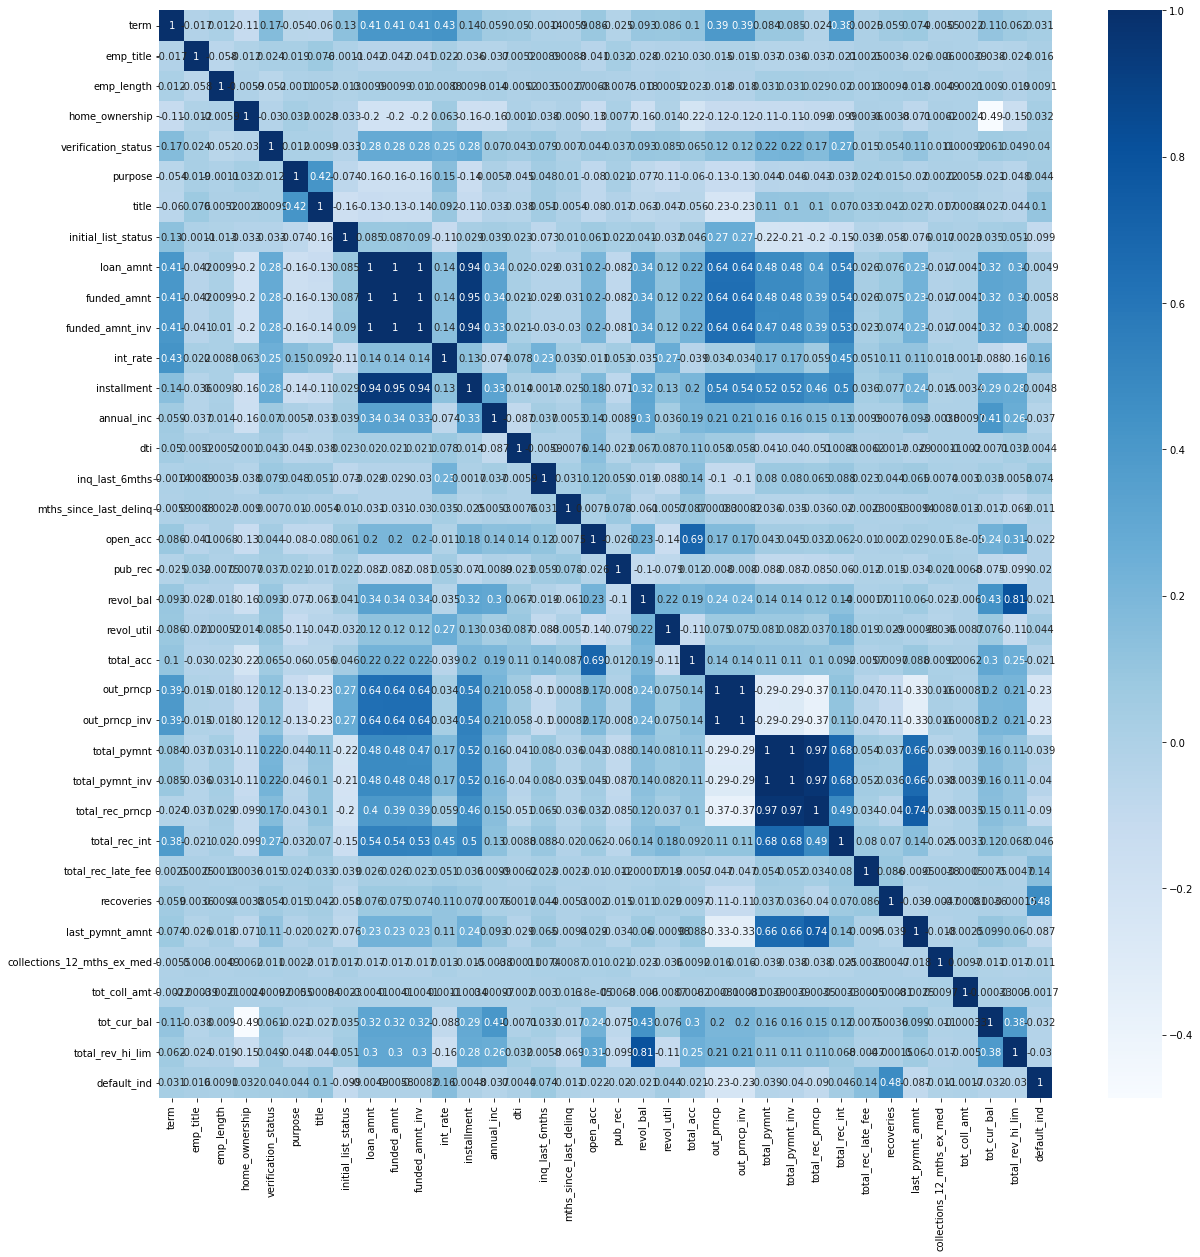

In [54]:
plt.figure(figsize=(20,20))
cor=xyz_new.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.show()

In [55]:
#dropping highly corelated features
xyz_new=xyz_new.drop(["funded_amnt","total_rev_hi_lim","total_rec_int","last_pymnt_amnt","total_rec_prncp","total_pymnt_inv",
                      "out_prncp_inv","total_acc","total_pymnt","installment","funded_amnt_inv"],axis=1)

# Treating outliers

In [56]:
num2=xyz_new.select_dtypes(include=[np.number])

In [57]:
num2.columns

Index(['term', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'initial_list_status',
       'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'out_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal',
       'default_ind'],
      dtype='object')

In [58]:
#num2.boxplot(figsize=(20,10))

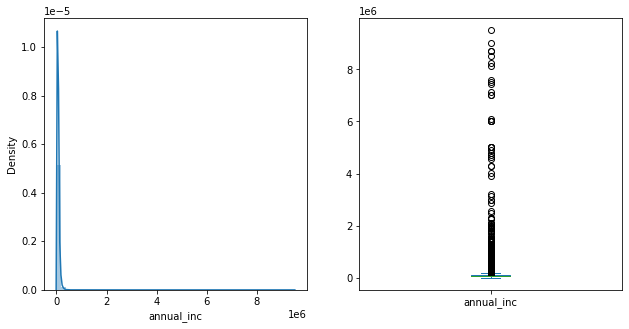

In [59]:
plt.figure(1)
plt.subplot(131)
sns.distplot(xyz_new['annual_inc']);

plt.subplot(132)
xyz_new['annual_inc'].plot.box(figsize=(16,5))

plt.show()

In [60]:
annual_inc_mean=int(xyz_new['annual_inc'].mean())

IQR_annual_inc_P75=xyz_new['annual_inc'].quantile(q=0.75)

IQR_annual_inc_P25=xyz_new['annual_inc'].quantile(q=0.25)

IQR_annual_inc = IQR_annual_inc_P75-IQR_annual_inc_P25

IQR_LL=int(IQR_annual_inc_P25 - 1.5*IQR_annual_inc)
IQR_UL=int(IQR_annual_inc_P25 + 1.5*IQR_annual_inc)

xyz_new.loc[xyz_new['annual_inc']>IQR_UL,'annual_inc']=annual_inc_mean
xyz_new.loc[xyz_new['annual_inc']>IQR_LL,'annual_inc']=annual_inc_mean

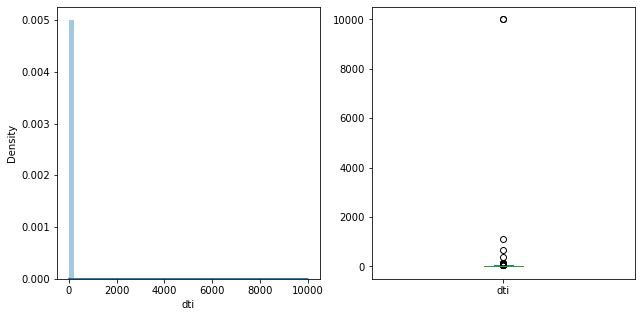

In [61]:
plt.figure(1)
plt.subplot(131)
sns.distplot(xyz_new['dti']);

plt.subplot(132)
xyz_new['dti'].plot.box(figsize=(16,5))

plt.show()

In [62]:
dti_mean=int(xyz_new['dti'].mean())

IQR_dti_P75=xyz_new['dti'].quantile(q=0.75)

IQR_dti_P25=xyz_new['dti'].quantile(q=0.25)

IQR_dti = IQR_dti_P75-IQR_dti_P25

IQR_LL=int(IQR_dti_P25 - 1.5*IQR_dti)
IQR_UL=int(IQR_dti_P25 + 1.5*IQR_dti)

xyz_new.loc[xyz_new['dti']>IQR_UL,'dti']=dti_mean
xyz_new.loc[xyz_new['dti']>IQR_LL,'dti']=dti_mean

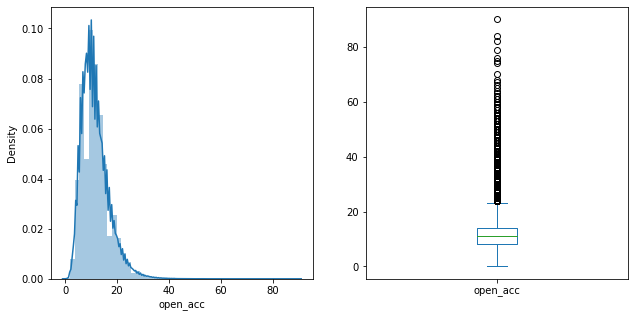

In [63]:
plt.figure(1)
plt.subplot(131)
sns.distplot(xyz_new['open_acc']);

plt.subplot(132)
xyz_new['open_acc'].plot.box(figsize=(16,5))

plt.show()

In [64]:
open_acc_mean=int(xyz_new['open_acc'].mean())

IQR_open_acc_P75=xyz_new['open_acc'].quantile(q=0.75)

IQR_open_acc_P25=xyz_new['open_acc'].quantile(q=0.25)

IQR_open_acc = IQR_open_acc_P75-IQR_open_acc_P25

IQR_LL=int(IQR_open_acc_P25 - 1.5*IQR_open_acc)
IQR_UL=int(IQR_open_acc_P25 + 1.5*IQR_open_acc)

xyz_new.loc[xyz_new['open_acc']>IQR_UL,'open_acc']=open_acc_mean
xyz_new.loc[xyz_new['open_acc']>IQR_LL,'open_acc']=open_acc_mean

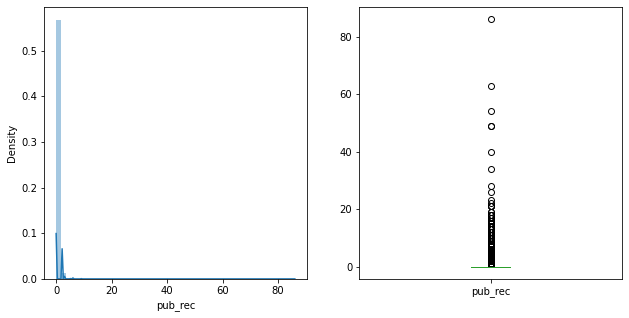

In [65]:
plt.figure(1)
plt.subplot(131)
sns.distplot(xyz_new['pub_rec']);

plt.subplot(132)
xyz_new['pub_rec'].plot.box(figsize=(16,5))

plt.show()

In [66]:
pub_rec_mean=int(xyz_new['pub_rec'].mean())

IQR_pub_rec_P75=xyz_new['pub_rec'].quantile(q=0.75)

IQR_pub_rec_P25=xyz_new['pub_rec'].quantile(q=0.25)

IQR_pub_rec = IQR_pub_rec_P75-IQR_pub_rec_P25

IQR_LL=int(IQR_pub_rec_P25 - 1.5*IQR_pub_rec)
IQR_UL=int(IQR_pub_rec_P25 + 1.5*IQR_pub_rec)

xyz_new.loc[xyz_new['pub_rec']>IQR_UL,'pub_rec']=pub_rec_mean
xyz_new.loc[xyz_new['pub_rec']>IQR_LL,'pub_rec']=pub_rec_mean

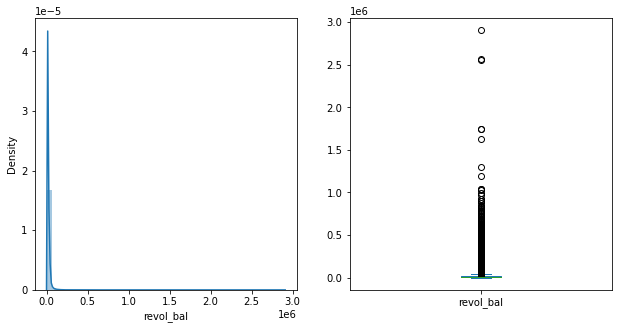

In [67]:
plt.figure(1)
plt.subplot(131)
sns.distplot(xyz_new['revol_bal']);

plt.subplot(132)
xyz_new['revol_bal'].plot.box(figsize=(16,5))

plt.show()

In [68]:
revol_bal_mean=int(xyz_new['revol_bal'].mean())

IQR_revol_bal_P75=xyz_new['revol_bal'].quantile(q=0.75)

IQR_revol_bal_P25=xyz_new['revol_bal'].quantile(q=0.25)

IQR_revol_bal = IQR_revol_bal_P75-IQR_revol_bal_P25

IQR_LL=int(IQR_revol_bal_P25 - 1.5*IQR_revol_bal)
IQR_UL=int(IQR_revol_bal_P25 + 1.5*IQR_revol_bal)

xyz_new.loc[xyz_new['revol_bal']>IQR_UL,'revol_bal']=revol_bal_mean
xyz_new.loc[xyz_new['revol_bal']>IQR_LL,'revol_bal']=revol_bal_mean

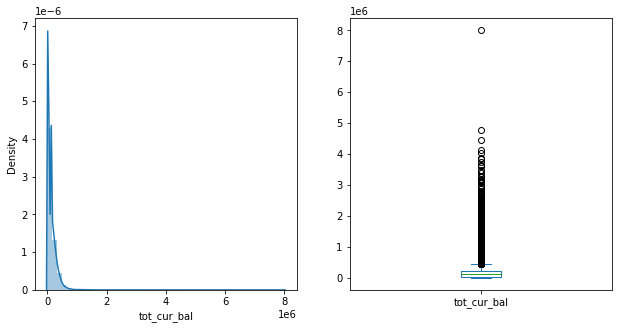

In [69]:
plt.figure(1)
plt.subplot(131)
sns.distplot(xyz_new['tot_cur_bal']);

plt.subplot(132)
xyz_new['tot_cur_bal'].plot.box(figsize=(16,5))

plt.show()

In [70]:
tot_cur_bal_mean=int(xyz_new['tot_cur_bal'].mean())

IQR_tot_cur_bal_P75=xyz_new['tot_cur_bal'].quantile(q=0.75)

IQR_tot_cur_bal_P25=xyz_new['tot_cur_bal'].quantile(q=0.25)

IQR_tot_cur_bal = IQR_tot_cur_bal_P75-IQR_tot_cur_bal_P25

IQR_LL=int(IQR_tot_cur_bal_P25 - 1.5*IQR_tot_cur_bal)
IQR_UL=int(IQR_tot_cur_bal_P25 + 1.5*IQR_tot_cur_bal)

xyz_new.loc[xyz_new['tot_cur_bal']>IQR_UL,'tot_cur_bal']=tot_cur_bal_mean
xyz_new.loc[xyz_new['tot_cur_bal']>IQR_LL,'tot_cur_bal']=tot_cur_bal_mean

In [71]:
xyz_new.shape

(855969, 25)

In [72]:
xyz_new.columns

Index(['term', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'initial_list_status',
       'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'out_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal',
       'default_ind'],
      dtype='object')

# class imbalance treatment

In [73]:
import imblearn

In [74]:
train=xyz_new.iloc[:,0:-1]
test=xyz_new.iloc[:,-1]

In [75]:
from imblearn.under_sampling import RandomUnderSampler

In [76]:
ab=RandomUnderSampler()
x_res,y_res=ab.fit_resample(train,test)

In [77]:
x_res.shape,y_res.shape

((92934, 24), (92934,))

# building model using classification algorithm

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
#splitting
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,random_state=100,test_size=.2)

In [80]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((74347, 24), (18587, 24), (74347,), (18587,))

In [81]:
#normalizing train data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [82]:
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)

In [83]:
from sklearn.linear_model import LogisticRegression
logmod=LogisticRegression()

In [84]:
logmod.fit(X_train,y_train)

LogisticRegression()

In [85]:
log_pred=logmod.predict(X_test)

In [86]:
log_predprob=logmod.predict_proba(X_test)[:,1]

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
log_mat=confusion_matrix(y_test,log_pred)
log_mat

array([[7911, 1421],
       [1181, 8074]], dtype=int64)

In [89]:
log_acc=log_mat.diagonal().sum()/log_mat.sum()*100
log_acc

86.00096841878732

In [90]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      9332
           1       0.85      0.87      0.86      9255

    accuracy                           0.86     18587
   macro avg       0.86      0.86      0.86     18587
weighted avg       0.86      0.86      0.86     18587



In [91]:
from sklearn.metrics import f1_score

In [92]:
roc=roc_auc_score(log_pred,y_test)
roc

0.860223936371448

In [93]:
fpr,tpr,threshold=roc_curve(log_pred,y_test)

In [94]:
fpr

array([0.        , 0.12989441, 1.        ])

In [95]:
tpr

array([0.        , 0.85034229, 1.        ])

In [96]:
threshold

array([2, 1, 0], dtype=int64)

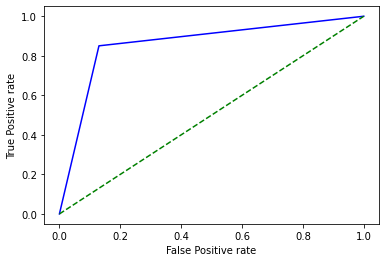

In [97]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.show()

In [99]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [100]:
precision,recall,threshold=precision_recall_curve(log_pred,y_test)

In [101]:
precision

array([0.51084091, 0.8723933 , 1.        ])

In [102]:
recall

array([1.        , 0.85034229, 0.        ])

In [103]:
threshold

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Precision-Recall')

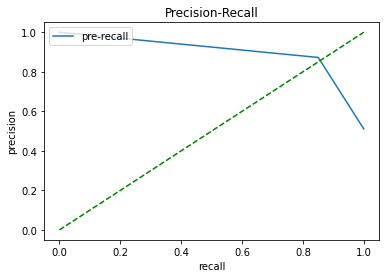

In [104]:
plt.plot(recall,precision, label="pre-recall")
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper left")
plt.title("Precision-Recall")

# 2. rf 

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [106]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [107]:
rf_pred=rf.predict(x_test)

In [108]:
rf_predprob=rf.predict_proba(x_test)[:,1]

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
rf_mat=confusion_matrix(y_test,rf_pred)

In [111]:
rf_mat

array([[7857, 1475],
       [ 862, 8393]], dtype=int64)

In [112]:
rf_acc=rf_mat.diagonal().sum()/rf_mat.sum()*100
rf_acc

87.42669607790391

In [113]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      9332
           1       0.85      0.91      0.88      9255

    accuracy                           0.87     18587
   macro avg       0.88      0.87      0.87     18587
weighted avg       0.88      0.87      0.87     18587



In [114]:
roc=roc_auc_score(rf_pred,y_test)
roc

0.8758312035650029

In [115]:
fpr,tpr,threshold=roc_curve(rf_pred,y_test)
fpr

array([0.        , 0.09886455, 1.        ])

In [116]:
tpr

array([0.        , 0.85052696, 1.        ])

In [117]:
threshold

array([2, 1, 0], dtype=int64)

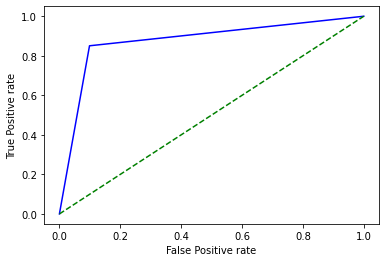

In [118]:
plt.plot(fpr,tpr,color='blue',label='RandomForest')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.show()

In [119]:
precision,recall,threshold=precision_recall_curve(rf_pred,y_test)

In [120]:
precision

array([0.5309087 , 0.90686116, 1.        ])

In [121]:
recall

array([1.        , 0.85052696, 0.        ])

In [122]:
threshold

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Precision-Recall')

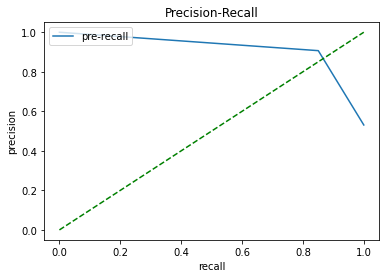

In [123]:
plt.plot(recall,precision, label="pre-recall")
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper left")
plt.title("Precision-Recall")

# 3.XG Boost 

In [124]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [125]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [126]:
xgb_pred=xgb.predict(x_test)

In [127]:
xgb_predprob=xgb.predict_proba(x_test)[:,1]

In [128]:
xgb_mat=confusion_matrix(xgb_pred,y_test)
xgb_mat

array([[7918,  877],
       [1414, 8378]], dtype=int64)

In [129]:
xgb_acc=xgb_mat.diagonal().sum()/xgb_mat.sum()*100
xgb_acc

87.67418087910906

In [130]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      9332
           1       0.86      0.91      0.88      9255

    accuracy                           0.88     18587
   macro avg       0.88      0.88      0.88     18587
weighted avg       0.88      0.88      0.88     18587

